In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV

In [137]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Shape of datasset",df.shape)
df.head()

Shape of datasset (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Visualization

Distribution of Some Interesting Discrete Features


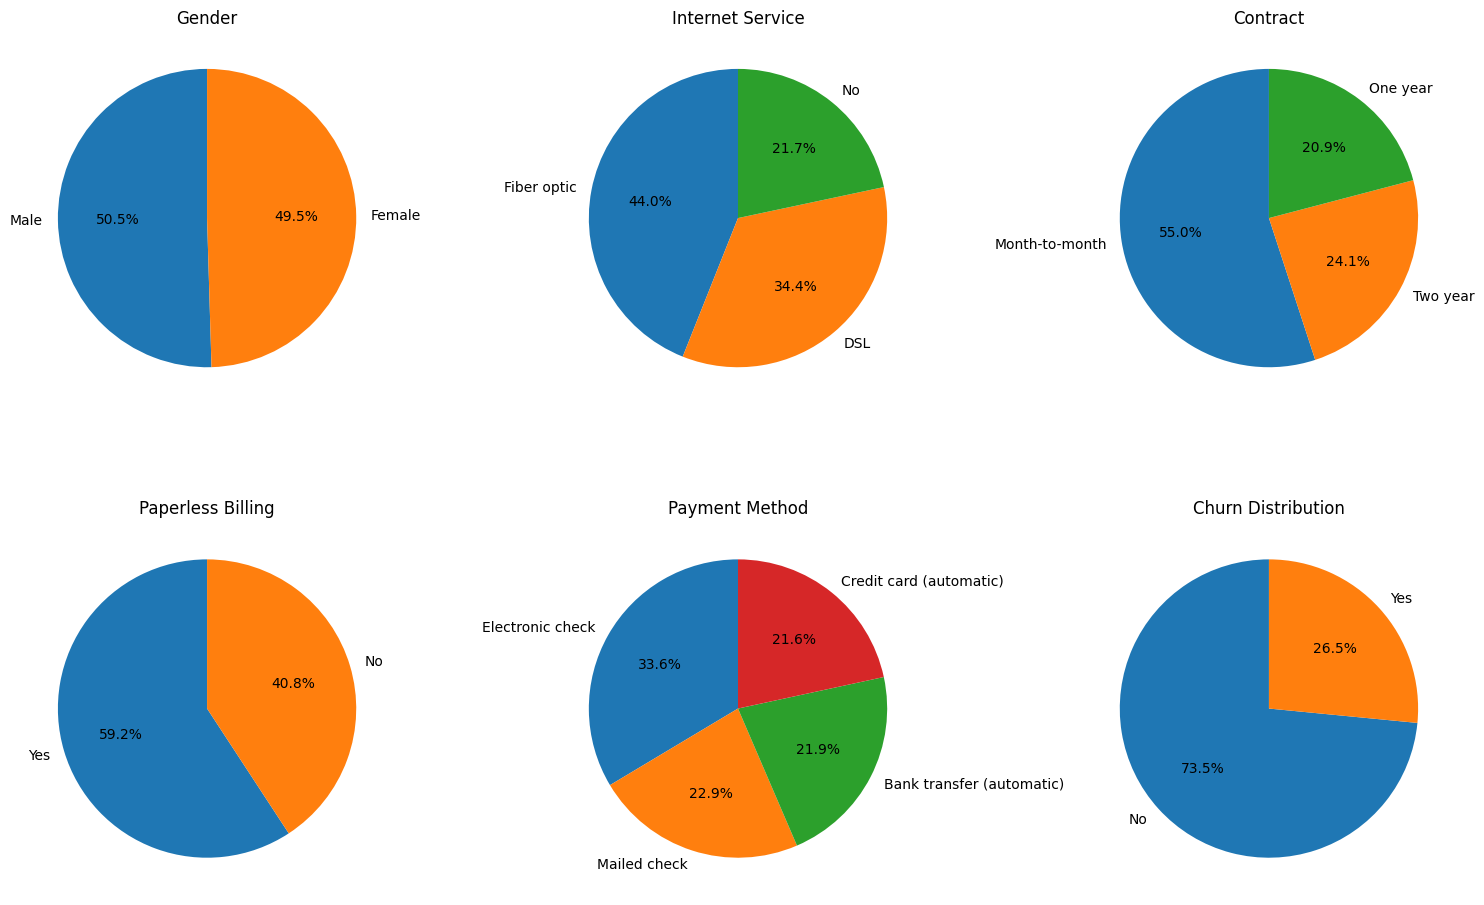

In [138]:
print("Distribution of Some Interesting Discrete Features")

# Define the data for each pie chart
gender_counts = df['gender'].value_counts()
internet_counts = df['InternetService'].value_counts()
contract_counts = df['Contract'].value_counts()
paperless_billing_counts = df['PaperlessBilling'].value_counts()
payment_method_counts = df['PaymentMethod'].value_counts()
churn_counts = df['Churn'].value_counts()



# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each pie chart in its corresponding subplot
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Gender')

axs[0, 1].pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Internet Service')

axs[0, 2].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Contract')

axs[1, 0].pie(paperless_billing_counts, labels=paperless_billing_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Paperless Billing')

axs[1, 1].pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Payment Method')

axs[1, 2].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 2].set_title('Churn Distribution')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


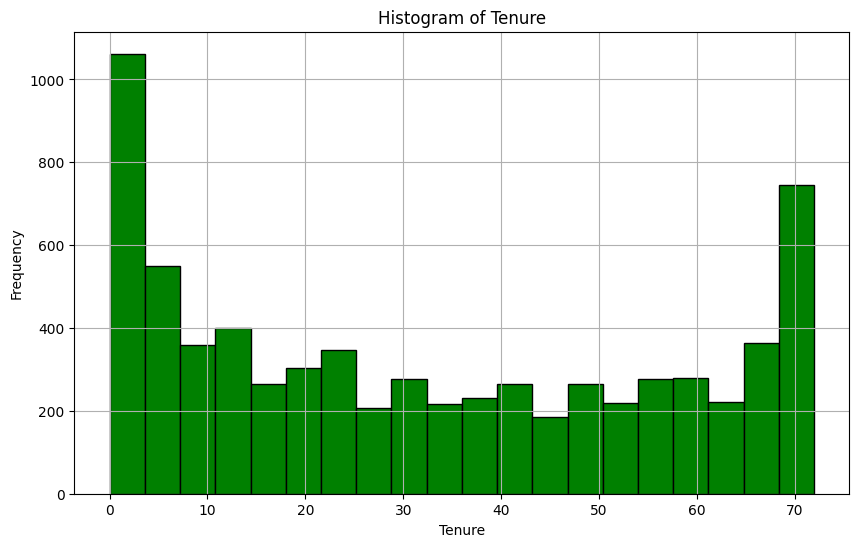

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=20, color='green', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.grid(True)
plt.show()

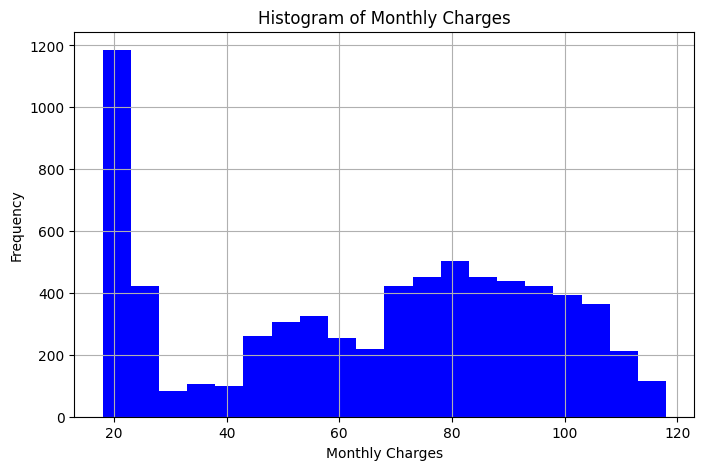

In [140]:
total_charges_data = df['MonthlyCharges'].astype('int')
plt.figure(figsize=(8, 5))
plt.hist(total_charges_data, bins=20, color='blue')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')
plt.grid(True)
plt.show()

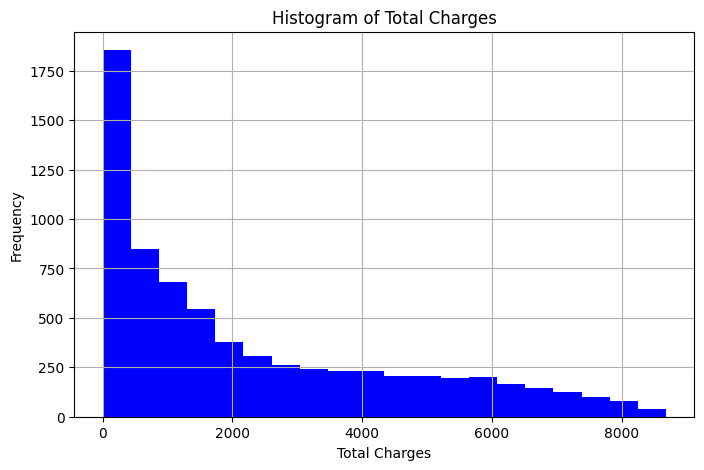

In [141]:
total_charges_data = df['TotalCharges'].replace(['', ' '], '0').astype('float').round(2).astype('int')
plt.figure(figsize=(8, 5))
plt.hist(total_charges_data, bins=20, color='blue')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')
plt.grid(True)
plt.show()

# Preprocessing

In [142]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Eleminate customerID
ds = df.loc[:, df.columns[1:]]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to be label encoded
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Apply label encoding
for col in label_cols:
    ds[col] = label_encoder.fit_transform(ds[col])

# Convert MonthlyCharges to int
ds['MonthlyCharges'] = ds['MonthlyCharges'].astype('int')

# Handle TotalCharges conversion
ds['TotalCharges'] = ds['TotalCharges'].replace(['', ' '], '0').astype('float').round(2).astype('int')

# Convert Churn to int
ds['Churn'] = ds['Churn'].astype('int')

print(ds.shape)
ds.head(10)


(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,820,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89,1949,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29,301,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104,3046,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56,3487,0


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ds.drop('Churn', axis=1)
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

[0.22213283 0.34423036 0.42302427 0.48687705 0.54359731 0.59633417
 0.64607414 0.69149591 0.73418299 0.77507283 0.81285851 0.84973182
 0.88580147 0.9158207  0.94544765 0.97007021 0.98681528 0.99718853
 1.        ]


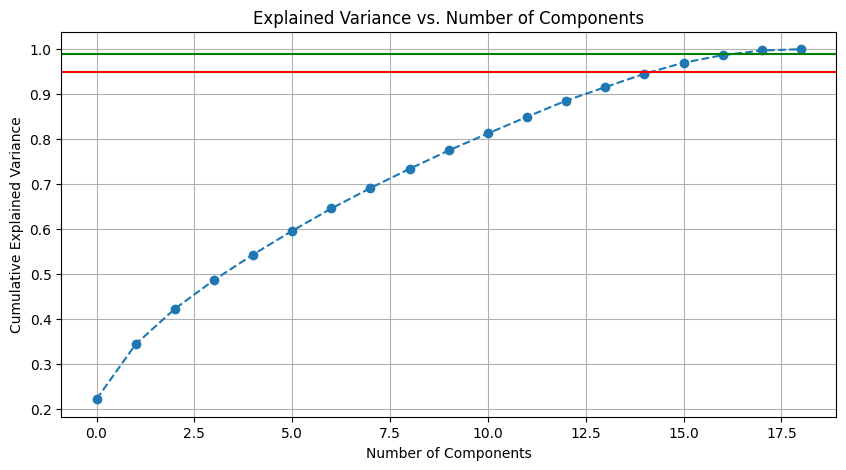

In [144]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca.fit(scaled_features)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.99, color='g', linestyle='-')
plt.grid()
plt.show()


In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(ds), columns=['comp1', 'comp2', 'comp3'])
pca_ds.head()

,comp1,comp2,comp3
0,-2250.677063,-9.233824,-17.059636
1,-390.292556,-6.691990,2.373069
2,-2171.466998,11.537934,-6.550816
3,-439.310484,-23.939581,6.707235
4,-2128.323746,26.640589,0.480017


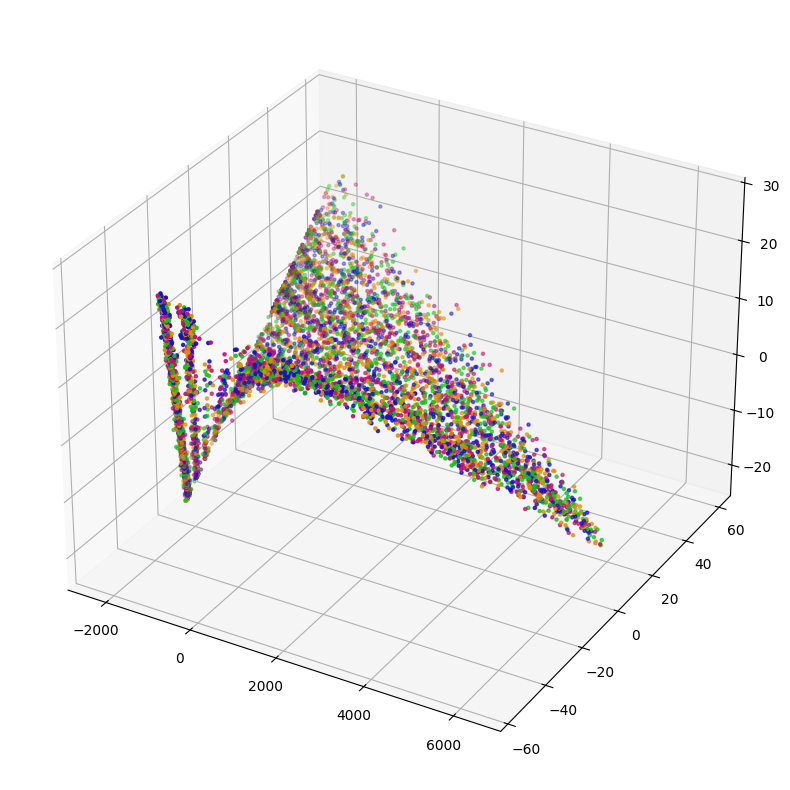

In [146]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = pca_ds['comp1']
y = pca_ds['comp2']
z = pca_ds['comp3']

color_values = [0, 1, 2, 3] * (len(x) // 4) + [0] * (len(x) % 4)

cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c=color_values, marker=".", cmap=cmap)
plt.show()
